In [1]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model
import os
import cv2
import imghdr

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
x_val, y_val = x_train[:6000],y_train[:6000]
x_train, y_train = x_train[6000:],y_train[6000:]

In [3]:
x_train.shape

(54000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_val.shape

(6000, 28, 28)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [7]:
model = Sequential()

In [19]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

ValueError: Input 0 of layer "conv2d_7" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1)

In [9]:
# model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [11]:
logdir='logs'

In [12]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [14]:
hist = model.fit(x_train, y_train,batch_size=64,epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
609/844 [====================>.........] - ETA: 5s - loss: -5917350821888.0000 - accuracy: 0.1120

KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [2]:
new_model = load_model('models\imageclassifier.h5')

In [3]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [4]:
for i in new_model.layers:
    print(i.name,sep='\n')

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten
dense
dense_1


In [5]:
new_model.layers

In [6]:
layer_outputs = [layer.output for layer in new_model.layers] 
# Extracts the outputs of the top 12 layers
activation_model = Model(inputs=new_model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [7]:
new_model.input

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'conv2d_input')>

In [8]:
layer_outputs

[<KerasTensor: shape=(None, 254, 254, 16) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 127, 127, 16) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 125, 125, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 62, 62, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 60, 60, 16) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 30, 30, 16) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 14400) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]

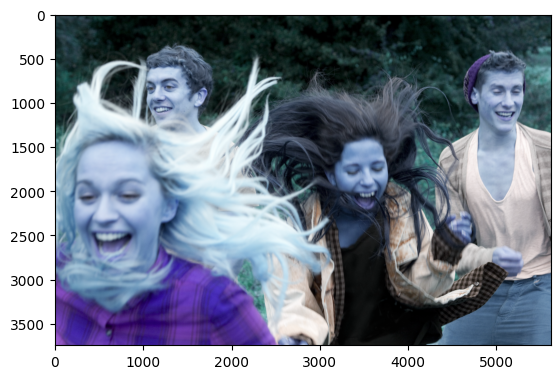

In [9]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

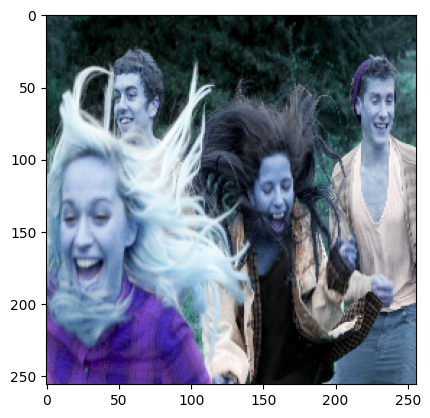

In [10]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [11]:
activations = activation_model.predict(np.expand_dims(resize/255, 0)) 

1/1 [==============================] - 0s 259ms/step


In [12]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 254, 254, 16)


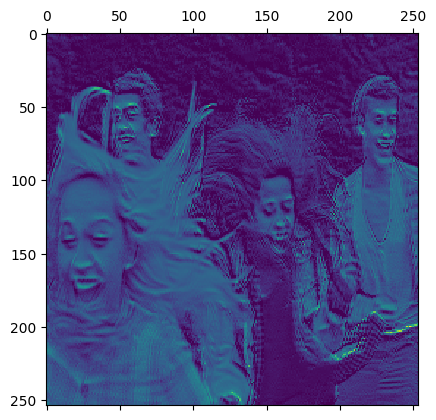

In [13]:
plt.matshow(first_layer_activation[0, :, :, 4])

# Display All conv2d activations

C:\Users\avitr\AppData\Local\Temp\ipykernel_50100\555332248.py:21: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


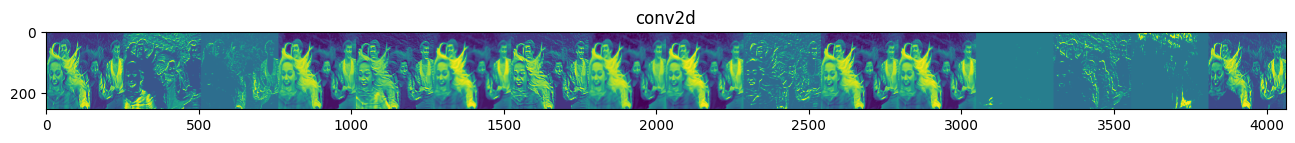

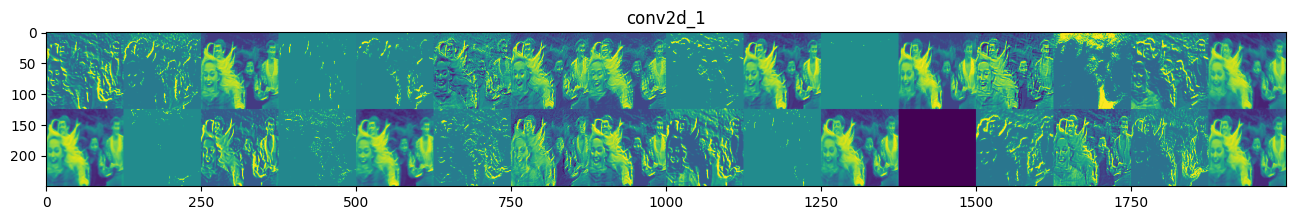

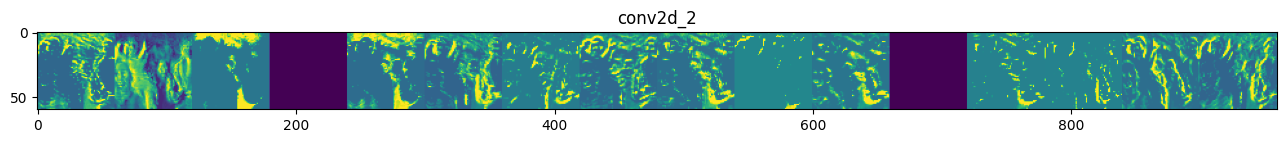

In [14]:
layer_names = []
for layer in new_model.layers:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

n = 0
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    
    if n in (0,2,4):
        n_features = layer_activation.shape[-1] # Number of features in the feature map
        size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
        n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols): # Tiles each filter into a big horizontal grid
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, # Displays the grid
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
    n = n + 1